In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
data = gpd.read_file('data/Pre1950Housing.shp')
#data.head()
# Load neighborhoods
NEIGHBORHOODS = gpd.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/pittsburghpaneighborhoods-.zip")
NEIGHBORHOODS['pre1950sTotal'] = 0
NEIGHBORHOODS['pre1950sCount'] = 0

for index, row in data.iterrows():
    for index2, row2 in NEIGHBORHOODS.iterrows():
        if row2["geometry"].intersects(row["geometry"]):
            NEIGHBORHOODS.loc[index2, 'pre1950sTotal'] += row['Pre1950']
            NEIGHBORHOODS.loc[index2, 'pre1950sCount'] += 1
            
NEIGHBORHOODS['Average']=NEIGHBORHOODS['pre1950sTotal'] / NEIGHBORHOODS['pre1950sCount']
NEIGHBORHOODS.plot(column = 'Average')
NEIGHBORHOODS.head()




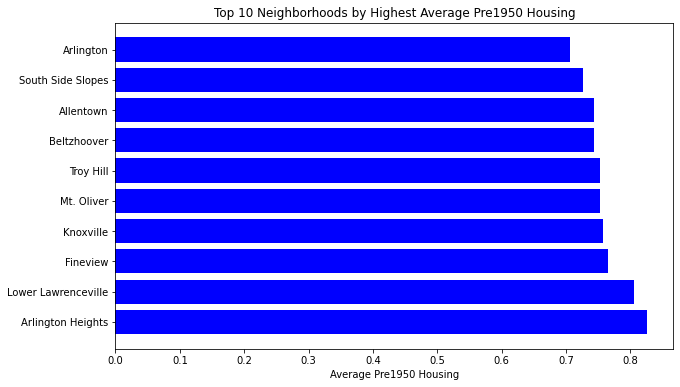

18      Arlington Heights
19    Lower Lawrenceville
89               Fineview
4               Knoxville
67             Mt. Oliver
65              Troy Hill
26            Beltzhoover
30              Allentown
48      South Side Slopes
49              Arlington
Name: hood, dtype: object

In [3]:
NEIGHBORHOODS = NEIGHBORHOODS.sort_values('Average',ascending = False)
top_10_neighborhoods = NEIGHBORHOODS.iloc[0:10,:]
plt.figure(figsize=(10, 6))
plt.barh(top_10_neighborhoods['hood'], top_10_neighborhoods['Average'], color='blue')
plt.xlabel('Average Pre1950 Housing')
plt.title('Top 10 Neighborhoods by Highest Average Pre1950 Housing')
plt.show()
NEIGHBORHOODS['hood'].head(10)

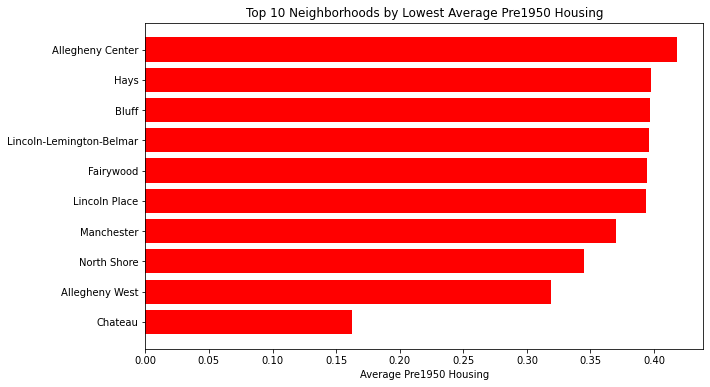

In [4]:
NEIGHBORHOODS = NEIGHBORHOODS.sort_values('Average', ascending=True)
lowest_10_neighborhoods = NEIGHBORHOODS.head(10)

# Plot the lowest 10 neighborhoods on a bar graph
plt.figure(figsize=(10, 6))
plt.barh(lowest_10_neighborhoods['hood'], lowest_10_neighborhoods['Average'], color='red')  # Using a different color for visualization
plt.xlabel('Average Pre1950 Housing')
plt.title('Top 10 Neighborhoods by Lowest Average Pre1950 Housing')
plt.show()

Looking at the data regarding to older housing we see that Arlington heights has the largest amount of 1950's housing.Arlington Heights was originally composed of 660 housing units built by the Housing Authority of Pittsburgh in 1942. Initially, the residents of these units consisted solely of war workers who had lived too far from their jobs or were living away from their families. On the other end we have chateau which has the least amount of older housing.A period commonly known as the ‘Pittsburgh Renaissance,’ beginning in 1946 and ending in 1973, saw large-scale urban redevelopment throughout the city, most notably downtown, the Hill district and Northside.